In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from math import log2
from math import sqrt
from numpy import asarray
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import glob
#import missingno as msno
import datetime
#from fbprophet import Prophet
%matplotlib inline
#import mplcyberpunk

In [2]:
df14 = pd.read_csv('../../Taipei_14.csv')
df15 = pd.read_csv('../../Taipei_15.csv')
df16 = pd.read_csv('../../Taipei_16.csv')
df17 = pd.read_csv('../../Taipei_17.csv')
df18 = pd.read_csv('../../Taipei_18.csv')
###########################################
df14 = df14.rename(columns={"PM2.5": "PM"})
df15 = df15.rename(columns={"PM2.5": "PM"})
df16 = df16.rename(columns={"PM2.5": "PM"})
df17 = df17.rename(columns={"PM2.5": "PM"})
df18 = df18.rename(columns={"PM2.5": "PM"})
df4= pd.DataFrame(df14)
df5= pd.DataFrame(df15)
df6= pd.DataFrame(df16[:157680])
df7= pd.DataFrame(df17)
df8= pd.DataFrame(df18)

In [3]:
r1=(df4[df14.SiteEngName =='Tamsui'])
(r1.PM)

8         26.0
26        28.0
44        31.0
62        35.0
80        36.0
          ... 
157598    22.0
157616    20.0
157634    20.0
157652    35.0
157670    58.0
Name: PM, Length: 8760, dtype: float64

In [4]:
df6

,Unnamed: 0,Unnamed: 0.1,SiteEngName,sn,AMB_TEMP,CH4,CO,NMHC,NO,NO2,...,WIND_DIREC,WIND_SPEED,WIND_cos,WIND_sin,WS_HR,W_HR_cos,W_HR_sin,lat,lon,read_time
0,1,2,Banqiao,板橋,17.00,2.00,0.56,0.15,1.7,14.0,...,72.00,1.60,0.494427,1.521690,1.20,-0.132465,-1.192666,"(25.01, 25.02)","(121.45, 121.46)",2016-01-01T00:00:00+00:00
1,2,3,Cailiao,菜寮,17.00,1.95,0.48,0.14,1.3,10.0,...,109.00,4.20,-1.367386,3.971178,3.70,0.147337,-3.697065,"(25.06, 25.07)","(121.48, 121.49)",2016-01-01T00:00:00+00:00
2,8,9,Datong,大同,16.49,2.00,1.00,0.23,9.4,22.0,...,101.90,4.14,-0.853685,4.051027,3.75,-0.193498,-0.616229,"(25.06, 25.07)","(121.51, 121.52)",2016-01-01T00:00:00+00:00
3,18,19,Guting,古亭,17.00,2.00,0.49,0.08,1.3,10.0,...,104.00,3.90,-0.943495,3.784153,3.60,-0.867453,-3.493927,"(25.02, 25.03)","(121.52, 121.53)",2016-01-01T00:00:00+00:00
4,25,26,Linkou,林口,15.00,1.95,0.43,0.14,0.8,6.3,...,83.00,4.60,0.560599,4.565712,4.00,-3.431212,2.055914,"(25.07, 25.08)","(121.36, 121.37)",2016-01-01T00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157675,665748,665749,Xinzhuang,新莊,19.00,1.95,0.38,0.17,2.2,16.0,...,58.00,4.90,2.596604,4.155436,4.80,4.732304,0.803307,"(25.03, 25.04)","(121.43, 121.44)",2016-12-30T23:00:00+00:00
157676,665750,665751,Xizhi,汐止,17.00,1.95,0.55,0.17,12.0,32.0,...,80.00,1.70,0.295202,1.674173,1.50,-0.165581,-1.490833,"(25.06, 25.07)","(121.64, 121.65)",2016-12-30T23:00:00+00:00
157677,665751,665752,Yangming,陽明,12.00,1.95,0.18,0.17,0.7,2.0,...,109.33,2.60,-0.860622,2.453432,2.40,0.271277,0.663385,"(25.18, 25.19)","(121.52, 121.53)",2016-12-30T23:00:00+00:00
157678,665753,665754,Yonghe,永和,19.00,1.90,0.42,0.12,2.5,15.0,...,89.00,2.50,0.043631,2.499619,2.80,-1.254606,2.503191,"(25.01, 25.02)","(121.51, 121.52)",2016-12-30T23:00:00+00:00


In [5]:
r=(df4[df14.SiteEngName =='Banqiao'])
s=(df5[df15.SiteEngName =='Banqiao'])
t=(df6[df16.SiteEngName =='Banqiao'])
u=(df7[df17.SiteEngName =='Banqiao'])
v=(df8[df18.SiteEngName =='Banqiao'])
#print(r.PM==s.PM)
#print(r.PM)
p=r.PM
q=s.PM
p1=t.PM
q1=u.PM
p2=v.PM;

<ipython-input-5-f59dd3f01fb1>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  t=(df6[df16.SiteEngName =='Banqiao'])


In [6]:
p

0         26.00
18        28.00
36        30.00
54        29.00
72        28.00
          ...  
157590    23.54
157608    24.58
157626    30.13
157644    41.21
157662    56.92
Name: PM, Length: 8760, dtype: float64

In [7]:
p01=np.array(p)
q01=np.array(q)
print(p01)


[26.   28.   30.   ... 30.13 41.21 56.92]


In [8]:
my_rho = np.corrcoef(p01,q01)
print(my_rho[0,1])
import numpy as np
import scipy.stats
r,p=scipy.stats.pearsonr(p01,q01)
print(r,p)
print(p)

0.15252570764339737
0.1525257076433974 9.538581704686208e-47
9.538581704686208e-47


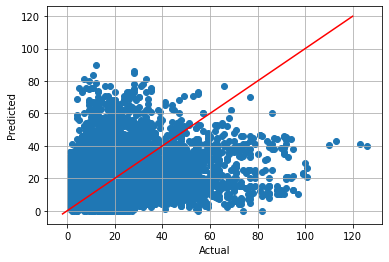

In [9]:
plt.scatter(p01, q01)
plt.plot([-2,120],[-2,120],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)

In [10]:
a=df14['SiteEngName'].unique()
pv1=[]
rv1=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    #counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y4=np.array(b1)
    #print(y4)
    #counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y5=np.array(b2)
    #print(y5)
    #counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y6=np.array(b3)
   # print(y6)
    #counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y7=np.array(b4)
    print(y7)
    #counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y8=np.array(b5)
    print(y8)
    print('=============')
   # ye45=np.corrcoef(y4,y5)
    r,p=scipy.stats.pearsonr(y4,y5)
    print(r,p)
    #ye46=np.corrcoef(y4,y6)
    r1,p1=scipy.stats.pearsonr(y4,y6)
    print(r1,p1)
    #ye47=np.corrcoef(y4,y7)
    r2,p2=scipy.stats.pearsonr(y4,y7)
    print(r2,p2)
    #ye48=np.corrcoef(y4,y8)
    r3,p3=scipy.stats.pearsonr(y4,y8)
    print(r3,p3)
    #ye56=np.corrcoef(y5,y6)
    r4,p4=scipy.stats.pearsonr(y5,y6)
    print(r4,p4)
    #ye57=np.corrcoef(y5,y7)
    r5,p5=scipy.stats.pearsonr(y5,y7)
    print(r5,p5)
   # ye58=np.corrcoef(y5,y8)
    r6,p6=scipy.stats.pearsonr(y5,y8)
    print(r6,p6)
    #ye67=np.corrcoef(y6,y7)
    r7,p7=scipy.stats.pearsonr(y6,y7)
    print(r7,p7)
    #ye68=np.corrcoef(y6,y8)
    r8,p8=scipy.stats.pearsonr(y6,y8)
    print(r8,p8)
    #ye78=np.corrcoef(y7,y8)
    r9,p9=scipy.stats.pearsonr(y7,y8)
    print(r9,p9)
    re=np.array([r,r1,r2,r3,r4,r5,r6,r7,r8,r9])
    pe=np.array([p,p1,p2,p3,p4,p5,p6,p7,p8,p9])
#je=np.array([ye45,ye46,ye47,ye48,ye56,ye57,ye58,ye67,ye68,ye78])
    #print(je)
    #print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
   # k2, op=stats.normaltest(je)
    #print(op)
    rv1.append(re)
    pv1.append(pe)
    #a5.nlargest(20,['PM'])
    
    #print(js_divergence(ab4,ab5))
    #print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

<ipython-input-10-5c62422a6a77>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a3=(df6[df16.SiteEngName==a[i]])


Banqiao
[ 6.  6.  6. ... 25. 20. 19.]
[20. 19. 17. ... 10.  4.  4.]
0.1525257076433974 9.538581704686208e-47
0.14895949708113596 1.207592293089186e-44
0.11371352126245701 1.316492564434371e-26
0.07414420835787397 3.702598815541509e-12
0.15639306277810033 4.376456879908037e-49
0.07687700237732285 5.80735459241812e-13
0.21068452162188003 1.8163493231082674e-88
0.20601856440963406 1.362565204857995e-84
0.2677106311677443 1.18372476932767e-143
0.1310937187319223 6.969012291038325e-35
Cailiao
[10. 12.  8. ... 15. 18. 16.]
[16. 19. 19. ...  1.  1.  1.]
0.14172111765372755 1.5530134599379012e-40
0.0862661778990912 6.06523989467315e-16
0.06354733154422301 2.6347647811327175e-09
-0.04690594195596966 1.1234036882183688e-05
0.19236179051083552 8.685542352638969e-74
0.13434366143497656 1.4543559979680816e-36
0.18536824546266628 1.4606473639050366e-68
0.22854900546851686 3.497651264009163e-104
0.19588765234003902 1.6812467848238196e-76
0.0997342325383006 8.233131096042214e-21
Datong
[ 4.  2.  5. ..

In [11]:
re[0]

0.12195762957041349

In [12]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(pv1[0]))


NameError: name 'stats' is not defined

In [13]:
rv1

[array([0.15252571, 0.1489595 , 0.11371352, 0.07414421, 0.15639306,
        0.076877  , 0.21068452, 0.20601856, 0.26771063, 0.13109372]),
 array([ 0.14172112,  0.08626618,  0.06354733, -0.04690594,  0.19236179,
         0.13434366,  0.18536825,  0.22854901,  0.19588765,  0.09973423]),
 array([0.13017314, 0.13013162, 0.07256208, 0.02119899, 0.15158131,
        0.07501101, 0.19693681, 0.18387126, 0.22974408, 0.10620572]),
 array([ 0.13156273,  0.09331353,  0.08226732,  0.01447049,  0.16305829,
         0.11535782, -0.00064904,  0.19810254,  0.04410129, -0.0650202 ]),
 array([ 0.07279332,  0.03197716,  0.04854301, -0.08331173,  0.1238889 ,
         0.13718588,  0.0965251 ,  0.15623474,  0.19275424,  0.00219968]),
 array([ 0.10477578,  0.09821032,  0.05465098, -0.02039341,  0.14453416,
         0.06950239,  0.17634327,  0.19626858,  0.19295845,  0.11362687]),
 array([ 0.07871769,  0.08033052,  0.02946482, -0.0495004 ,  0.10817838,
         0.04286863,  0.14270453,  0.18267658,  0.1570216 ,

In [14]:
a[0]

'Banqiao'

In [15]:
re
import statistics


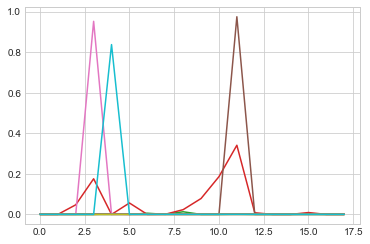

In [16]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
plt.plot(pv1)


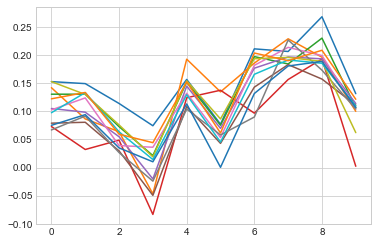

In [17]:
plt.plot(rv1[0],label='a')
plt.plot(rv1[1],label='ax1')
plt.plot(rv1[2],label='ax1')
plt.plot(rv1[4],label='ax1')
plt.plot(rv1[5],label='ax1')
plt.plot(rv1[6],label='ax1')
plt.plot(rv1[7],label='ax1')
plt.plot(rv1[8],label='ax1')
plt.plot(rv1[9],label='ax1')
plt.plot(rv1[10],label='ax1')
plt.plot(rv1[11],label='ax1')

plt.plot(rv1[17],label='ax1')


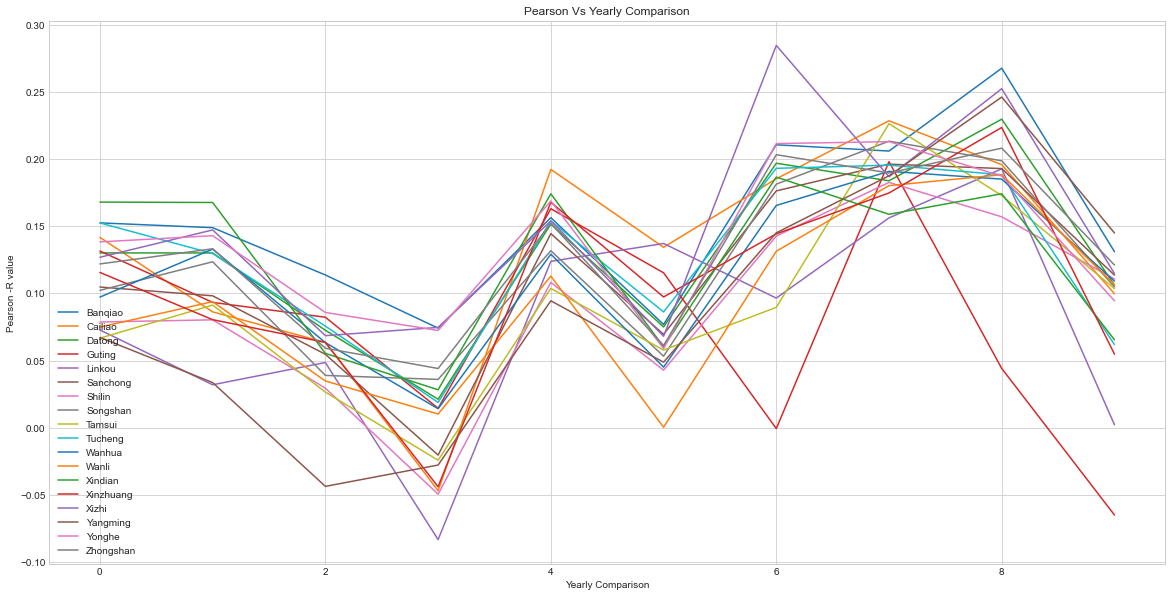

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for i in range(18):
    plt.plot(rv1[i],label=a[i])
#plt.plot(rv1[1],label=a[1])
#plt.plot(rv1[2],label=a[1])
plt.xlabel('Yearly Comparison')
plt.ylabel('Pearson -R value')
plt.legend()
plt.title('Pearson Vs Yearly Comparison')
plt.show()

In [19]:
rv1

[array([0.15252571, 0.1489595 , 0.11371352, 0.07414421, 0.15639306,
        0.076877  , 0.21068452, 0.20601856, 0.26771063, 0.13109372]),
 array([ 0.14172112,  0.08626618,  0.06354733, -0.04690594,  0.19236179,
         0.13434366,  0.18536825,  0.22854901,  0.19588765,  0.09973423]),
 array([0.13017314, 0.13013162, 0.07256208, 0.02119899, 0.15158131,
        0.07501101, 0.19693681, 0.18387126, 0.22974408, 0.10620572]),
 array([ 0.13156273,  0.09331353,  0.08226732,  0.01447049,  0.16305829,
         0.11535782, -0.00064904,  0.19810254,  0.04410129, -0.0650202 ]),
 array([ 0.07279332,  0.03197716,  0.04854301, -0.08331173,  0.1238889 ,
         0.13718588,  0.0965251 ,  0.15623474,  0.19275424,  0.00219968]),
 array([ 0.10477578,  0.09821032,  0.05465098, -0.02039341,  0.14453416,
         0.06950239,  0.17634327,  0.19626858,  0.19295845,  0.11362687]),
 array([ 0.07871769,  0.08033052,  0.02946482, -0.0495004 ,  0.10817838,
         0.04286863,  0.14270453,  0.18267658,  0.1570216 ,

In [22]:
column_values=['Pvalue'] 
dfr = pd.DataFrame(data = rv1,  
                  index = a,  
                  columns =['y45', 'y46', 'y47', 'y48','y56','y57','y58','y67','y68','y78']) 

# displaying the dataframe 
#print(dfr) 
y45=dfr.y45
y46=dfr.y46
y47=dfr.y47
y48=dfr.y48
y56=dfr.y56
y57=dfr.y57
y58=dfr.y58
y67=dfr.y67
y68=dfr.y68
y78=dfr.y78



dfz = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48,'y56': y56,'y57': y57,'y58': y58,'y58': y58,'y67':y67,'y68':y68,'y78':y78}, index=a)
dfz4 = pd.DataFrame({'y45': y45,
'y46': y46,'y47': y47,'y48': y48},index=a)
dfz5 = pd.DataFrame({'y56': y56,'y57': y57,'y58': y58,'y58': y58},index=a)
dfz6 = pd.DataFrame({'y67':y67,'y68':y68,'y78':y78},index=a)

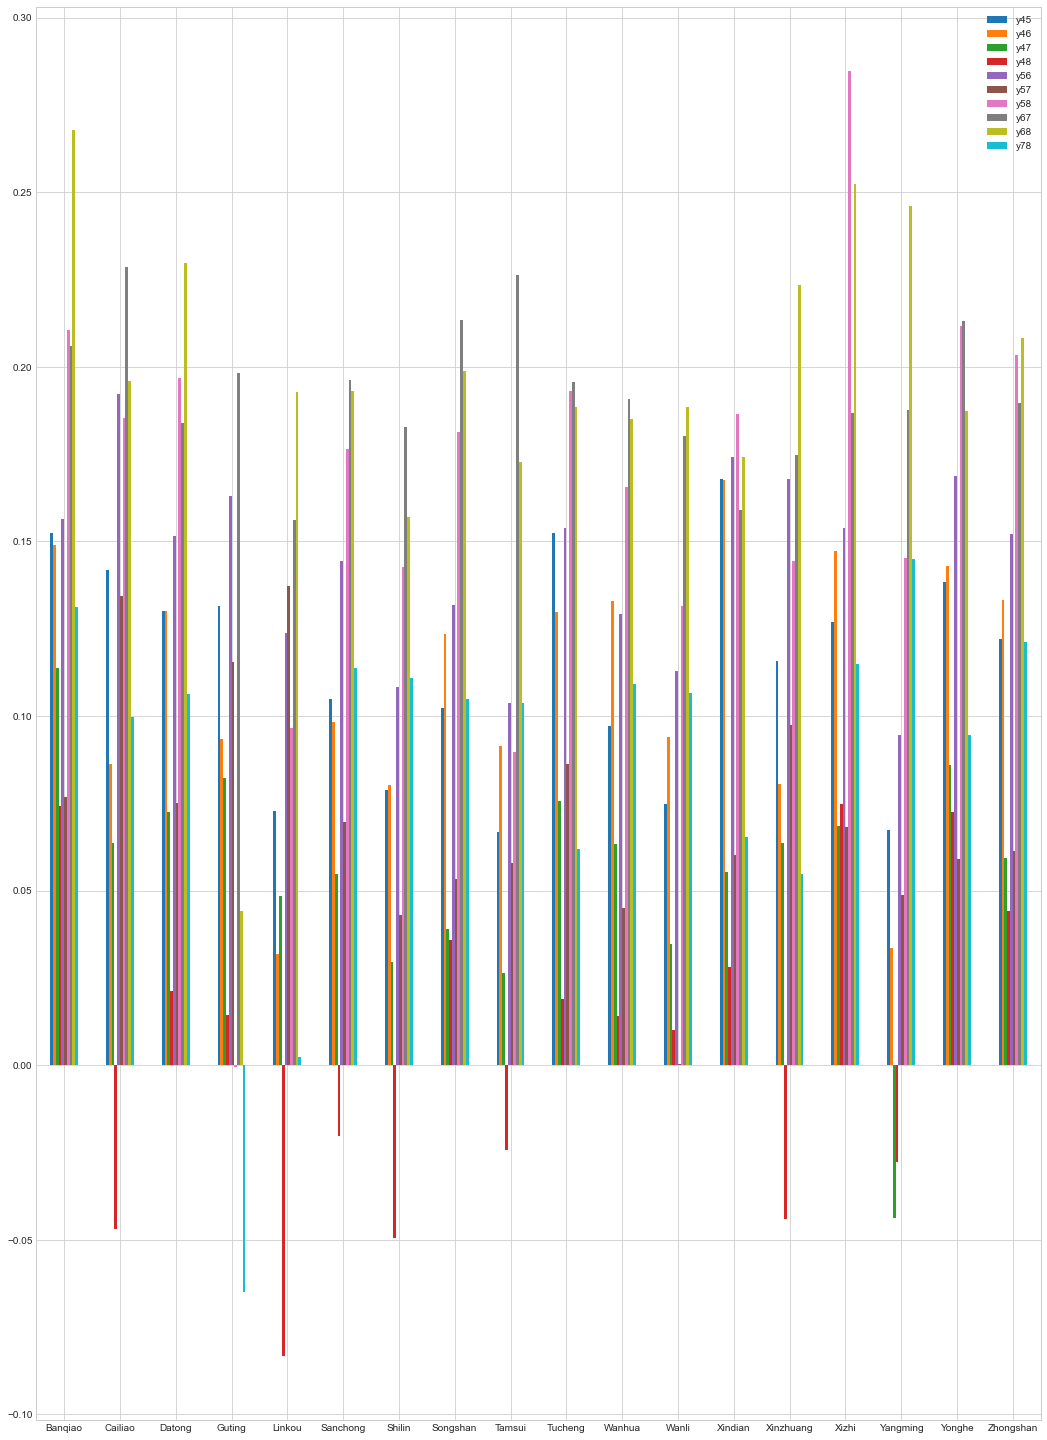

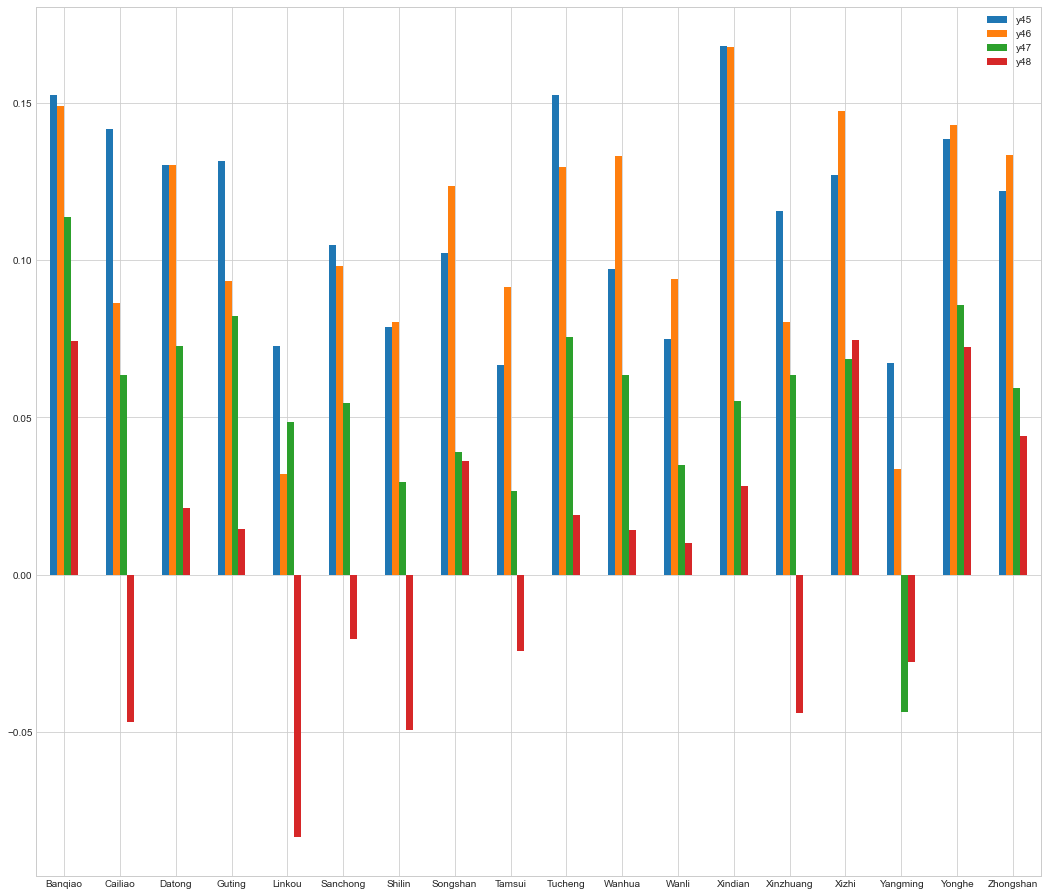

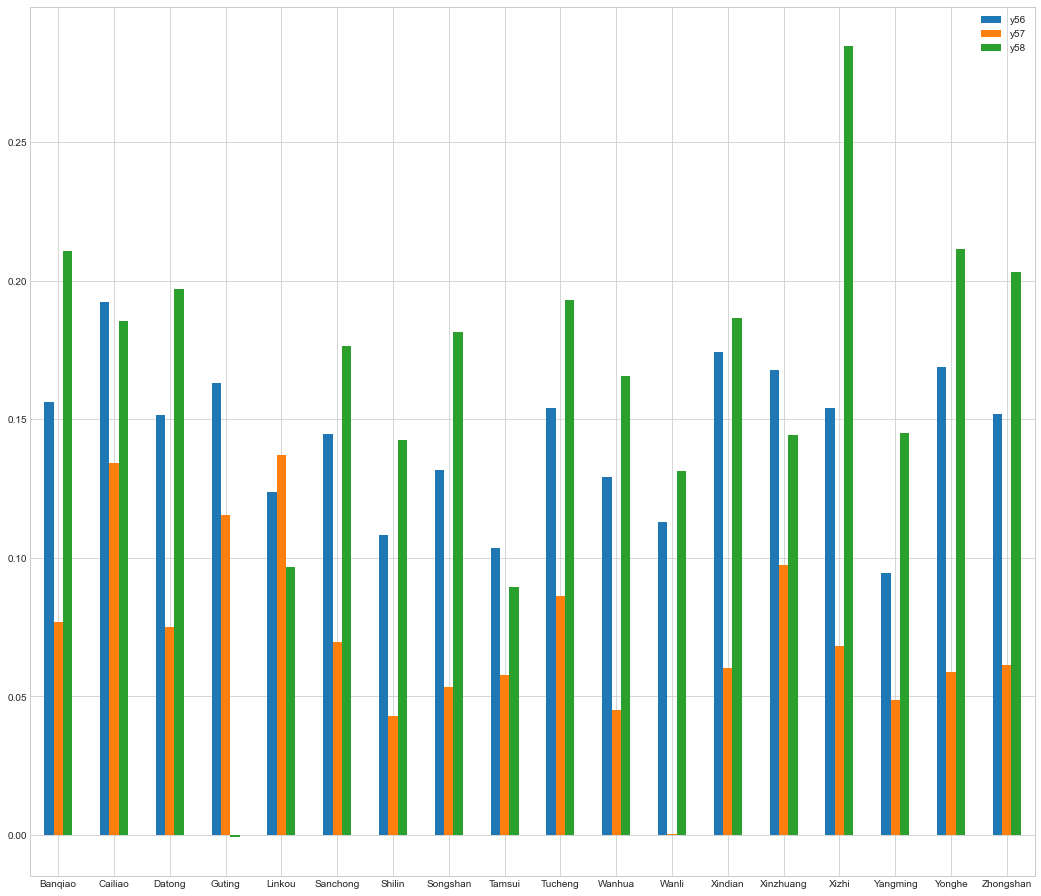

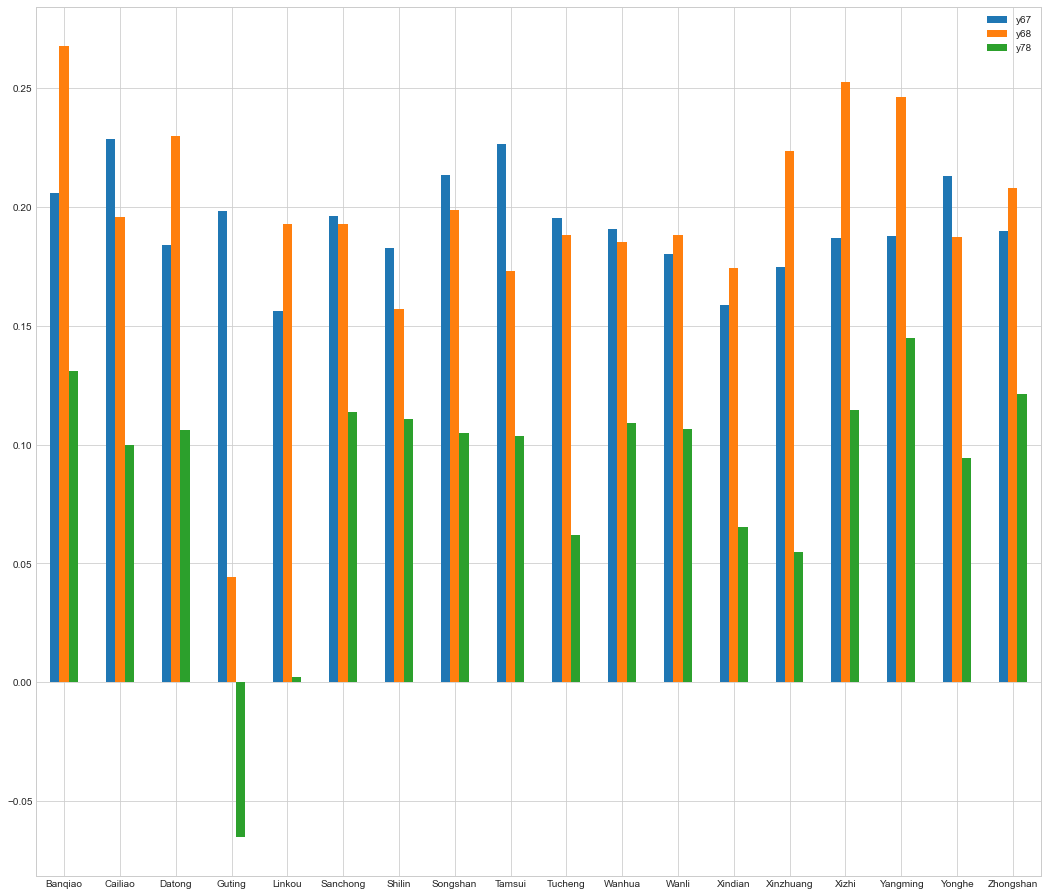

In [25]:
ax1 = dfz.plot.bar(rot=0, figsize=(18, 26))
ax14 = dfz4.plot.bar(rot=0, figsize=(18, 16))
ax15 = dfz5.plot.bar(rot=0, figsize=(18, 16))
ax16 = dfz6.plot.bar(rot=0, figsize=(18, 16))


speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
  'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)


df

#dfr.plot.bar()
dfr['index'].value_counts().plot(kind='bar');


ax.bar = dfr.y45.plot.bar()
ax = dfr.y46.plot.bar()
ax = dfr.y47.plot.bar()
ax = dfr.y48.plot.bar()

dfr.plot(kind="bar")


ax.bar = dfr.y45()


#dfr.plot(kind='bar')
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(a[0], dfr[0], color = 'b', width = 0.25)
ax.bar(a, df4[1], color = 'g', width = 0.25)
ax.bar(a, dfr[2], color = 'r', width = 0.25)

data.floors.value_counts().plot(kind='bar')

fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,20))

sns.set_style("whitegrid")
sns.barplot(data=rv1, x=rv1, y='a[i]', palette='magma_r', ax=ax[0])
ax[0].title.set_text('Revenue by Months')
add_value_labels(ax[0])

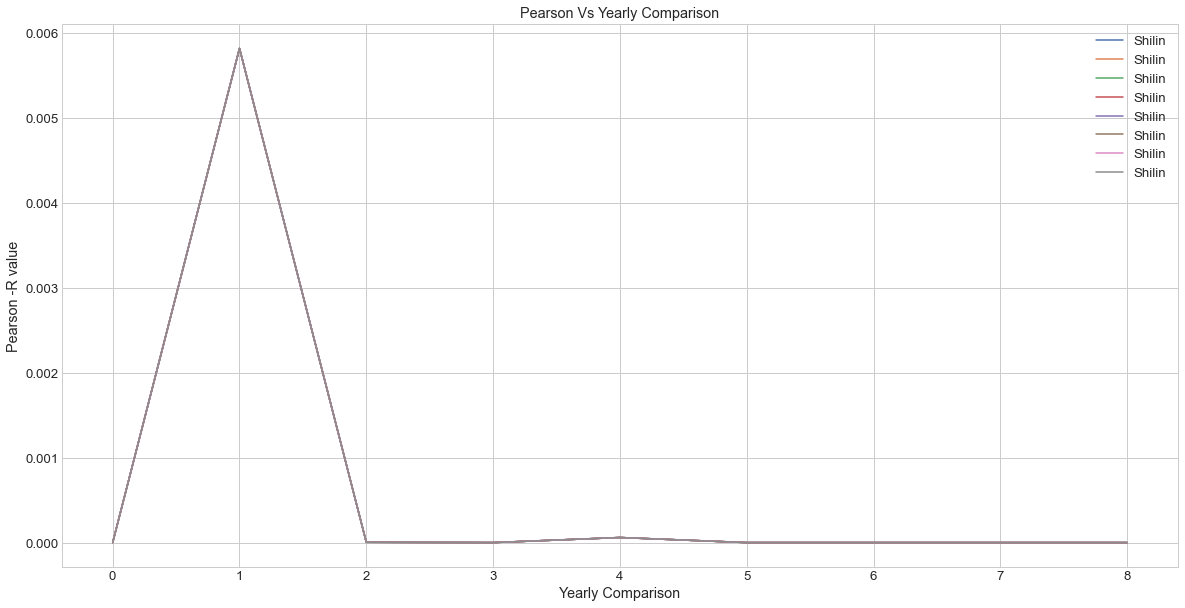

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
i=6
for i in range(8):
    i=6
    plt.plot(pv1[i],label=a[i])
#plt.plot(rv1[1],label=a[1])
#plt.plot(rv1[2],label=a[1])
plt.xlabel('Yearly Comparison')
plt.ylabel('Pearson -R value')
plt.legend()
plt.title('Pearson Vs Yearly Comparison')
plt.show()

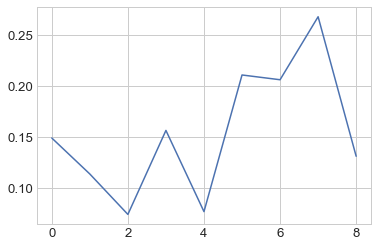

In [35]:
plt.plot(rv1[0],label='Ban')


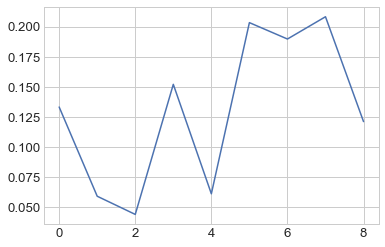

In [36]:
plt.plot(rv1[17],label='ax1')


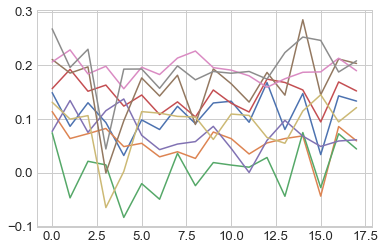

In [37]:
plt.plot(rv1)

In [38]:
sns.set_theme(style="whitegrid")
mean_score_time_plot = sns.lineplot(data=rv1,x ='year', y='Life Ladder' ,palette="tab10", linewidth=2.5, hue = 'a')
mean_score_time_plot.set_title('Mean score of happiness in time',  size = 30);
mean_score_time_plot.set_ylabel('mean score', fontsize=20)
mean_score_time_plot.set_xlabel('year', fontsize=20);

C:\Users\Khalid\anaconda3\lib\site-packages\seaborn\_core.py:881: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


ValueError: Could not interpret value `year` for parameter `x`

In [39]:
p.describe()

AttributeError: 'numpy.float64' object has no attribute 'describe'

In [40]:
counts, bin_edges = np.histogram(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y4=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y5=counts
counts, bin_edges = np.histogram(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y6=counts
counts, bin_edges = np.histogram(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y7=counts
counts, bin_edges = np.histogram(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
print(counts)
y8=counts

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 832 2016 2008 1164  976  670  429  272  152  114   54   38   14   12
    5    3    1    0    0    0    0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
an=np.array(y4)
an


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

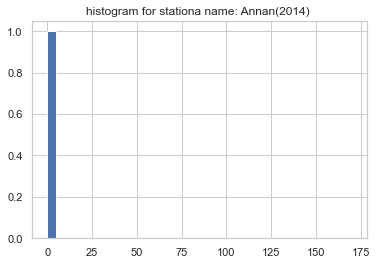

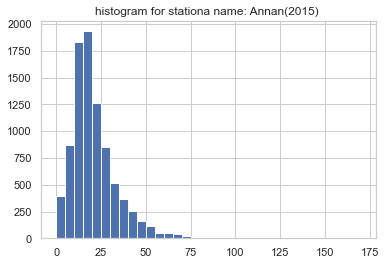

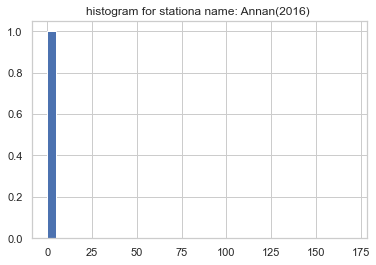

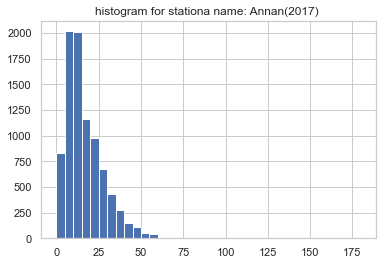

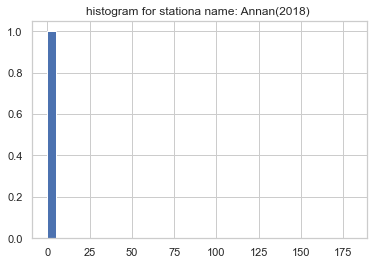

In [42]:
plt.hist(p, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2014) ") 
plt.show()
plt.hist(q, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2015) ") 
plt.show()
plt.hist(p1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170]) 
plt.title("histogram for stationa name: Annan(2016) ") 
plt.show()
plt.hist(q1, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2017) ") 
plt.show()
plt.hist(p2, bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,180]) 
plt.title("histogram for stationa name: Annan(2018) ") 
plt.show()

In [43]:
p.mean()

2.200152715351282e-30

In [44]:
print(y4.mean())
print(y5.mean())
print(y6.mean())
print(y7.mean())
print(y8.mean())
print('minimum value')
print(y4.min())
print(y5.min())
print(y6.min())
print(y7.min())
print(y8.min())

0.047619047619047616
0.047619047619047616
0.047619047619047616
417.14285714285717
0.047619047619047616
minimum value
0
0
0
0
0


In [45]:
from time import sleep

print('Will it get printed immediately?', end='')
sleep(5)

Will it get printed immediately?

In [46]:
y4

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [47]:
from scipy import stats
#rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(y4,25.0))
print (stats.ttest_1samp(y5,417.0))
print (stats.ttest_1samp(y6,418.0))
print (stats.ttest_1samp(y7,417))
print (stats.ttest_1samp(y8,417))


Ttest_1sampResult(statistic=-524.0, pvalue=7.402372001636885e-43)
Ttest_1sampResult(statistic=-8756.0, pvalue=2.5714758803857777e-67)
Ttest_1sampResult(statistic=-8777.0, pvalue=2.4511819566592807e-67)
Ttest_1sampResult(statistic=0.0010230459462152461, pvalue=0.9991938632967169)
Ttest_1sampResult(statistic=-8756.0, pvalue=2.5714758803857777e-67)


In [48]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

normaltest teststat = 53.773 pvalue = 0.0000


In [ ]:
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(y4))

In [ ]:
print('normaltest teststat = %6.3f pvalue = %6.4f' %
      stats.normaltest((y4-y4.mean())/y4.std()))

In [ ]:
d, pval = stats.kstest((y4-y4.mean())/y4.std(), 'norm')
print('KS-statistic D = %6.3f pvalue = %6.4f' % (d, pval))

In [ ]:
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(y4,417))

In [ ]:
data = {
...     'a': [0.9, 1.0, 1.1, 1.2],
...     'b': [0.8, 0.9, 1.0, 1.1],
...     'c': [4.9, 5.0, 5.1, 5.2],
... }
from scipy.stats import f_oneway
t, p =  f_oneway(*data.values())
p

In [ ]:
np.random.seed(282629734)
x = stats.t.rvs(10, size=1000)
m, v, s, k = stats.t.stats(10, moments='mvsk')
n, (smin, smax), sm, sv, ss, sk = stats.describe(x)
sstr = '%-14s mean = %6.4f, variance = %6.4f, skew = %6.4f, kurtosis = %6.4f'
print(sstr % ('distribution:', m, v, s ,k))

print(sstr % ('sample:', sm, sv, ss, sk))
print('t-statistic = %6.3f pvalue = %6.4f' %  stats.ttest_1samp(x, m))
x.min()

In [ ]:
stats.describe(x)

In [ ]:
print (stats.ttest_1samp(y4,4.0))


In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.4f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
from scipy import stats


In [ ]:
a=df14['SiteEngName'].unique()
opv=[]
for i in range(18):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print('==============')
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y4=counts
    print(y4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y5=counts
    print(y5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y6=counts
    print(y6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y7=counts
    print(y7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,370])
    y8=counts
    print(y8)
    print('=============')
    ye45=jensenshannon(y4,y5)
    ye46=jensenshannon(y4,y6)
    ye47=jensenshannon(y4,y7)
    ye48=jensenshannon(y4,y8)
    ye56=jensenshannon(y5,y6)
    ye57=jensenshannon(y5,y7)
    ye58=jensenshannon(y5,y8)
    ye67=jensenshannon(y6,y7)
    ye68=jensenshannon(y6,y8)
    ye78=jensenshannon(y7,y8)
    je=np.array([ye45,ye46,ye47,ye48,ye56,ye57,ye58,ye67,ye68,ye78])
    print(je)
    print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(je))
    k2, op=stats.normaltest(je)
    print(op)
    opv.append(op)
    #a5.nlargest(20,['PM'])
    
    #print(js_divergence(ab4,ab5))
    #print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

In [ ]:
import pandas as pd 
import numpy as np 
  
# creating the Numpy array 
array = np.array([[1, 1, 1], [2, 4, 8], [3, 9, 27],  
                  [4, 16, 64], [5, 25, 125], [6, 36, 216],  
                  [7, 49, 343]]) 
  
# creating a list of index names 
index_values = ['first', 'second', 'third', 
                'fourth', 'fifth', 'sixth', 'seventh'] 
   
# creating a list of column names 
column_values = ['number', 'squares', 'cubes'] 
  
# creating the dataframe 
df = pd.DataFrame(data = array,  
                  index = index_values,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

In [ ]:
p

In [ ]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y4, f_exp=y5)

In [ ]:
 import scipy.stats as stats

#perform Chi-Square Goodness of Fit Test
stats.chisquare(f_obs=y5, f_exp=y4)

In [ ]:
opv

In [ ]:
column_values=['Pvalue'] 
df = pd.DataFrame(data = opv,  
                  index = a,  
                  columns = column_values) 
  
# displaying the dataframe 
print(df) 

In [ ]:
df.nlargest(18, ['Pvalue']) 

In [ ]:
df.nsmallest(5, ['Pvalue'])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4.0,'color':'teal' ,'label':'Year-14',},name="x variable"
             ax=ax[0])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Dongshan')
sns.distplot(df14[df14['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df15[df15['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Dongshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Dongshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
#plt.title('Shanhua')
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('Shanhua')
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
#plt.title('Shanhua',ax=ax[0])    
sns.distplot(df15[df15['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
#plt.title('Dongshan')     
sns.distplot(df18[df18['SiteEngName']=='Shanhua'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Shanhua'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xinying')     
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Puli')     
sns.distplot(df15[df15['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Puli'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Puli'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Datong')     
sns.distplot(df15[df15['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Datong'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Datong'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])

In [ ]:
#"Chiayi	0.037214
#Songshan	0.040234
#Fengyuan	0.043167
#Xingang	0.076680
#Sanyi	0.176619"

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Chiayi')     
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Songshan')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Fengyuan')     
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Xingang')     
sns.distplot(df15[df15['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xingang'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Xingang'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('Sanyi')     
sns.distplot(df15[df15['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Sanyi'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Sanyi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Xinying'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Xinying'].PM,ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=100,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
            
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(14,6))
plt.title('PM2.5 and DIR')
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[0])
plt.title('PM2.5 and DIR')     
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'blue' ,'label':'Year-15',},
             ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'green' ,'label':'Year-16',},
             ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'purple' ,'label':'Year-17',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,kde=True,hist=True,bins=4,
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth':3.0,'color':'orange' ,'label':'Year-18',},
             ax=ax[1])
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,
             kde=True,hist=True,bins=50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':3.0,'color':'red' ,'label':'Year-14',},
             ax=ax[1])


In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Songshan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Songshan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Songshan'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Chiayi'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Chiayi'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Chiayi'].PM,ax=ax[1])

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,6))
sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df16[df16['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df17[df17['SiteEngName']=='Fengyuan'].PM,ax=ax[0])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[0])

sns.distplot(df14[df14['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df15[df15['SiteEngName']=='Fengyuan'].PM,ax=ax[1])
sns.distplot(df18[df18['SiteEngName']=='Fengyuan'].PM,ax=ax[1])

In [ ]:
MAX = 100000
  
def Print3Smallest(arr, n): 
    firstmin = MAX
    secmin = MAX
    thirdmin = MAX
  
    for i in range(0, n): 
          
        # Check if current element 
        # is less than firstmin,  
        # then update first,second 
        # and third 
  
        if arr[i] < firstmin: 
            thirdmin = secmin 
            secmin = firstmin 
            firstmin = arr[i] 
  
        # Check if current element is 
        # less than secmin then update 
        # second and third 
        elif arr[i] < secmin: 
            thirdmin = secmin 
            secmin = arr[i] 
  
        # Check if current element is 
        # less than,then upadte third 
        elif arr[i] < thirdmin: 
            thirdmin = arr[i] 
  
    print("First min = ", firstmin) 
    print("Second min = ", secmin) 
    print("Third min = ", thirdmin) 
  
  
# driver program 
arr = opv
n = len(arr) 
Print3Smallest(arr, n) 

In [ ]:
import sys 
  
# Function to print largest element in 
# first half and second half of an array 
def findMax(arr, n) : 
  
    # To store the maximum element 
    # in the first half 
    maxFirst = -sys.maxsize - 1
  
    # Middle index of the array 
    mid = n // 2; 
  
    # Calculate the maximum element 
    # in the first half 
    for i in range(0, mid): 
        maxFirst = max(maxFirst, arr[i]) 
  
    # If the size of array is odd then 
    # the middle element will be included 
    # in both the halves 
    if (n % 2 == 1): 
        maxFirst = max(maxFirst, arr[mid]) 
  
    # To store the maximum element 
    # in the second half 
    maxSecond = -sys.maxsize - 1
  
    # Calculate the maximum element 
    # int the second half 
    for i in range(mid, n): 
        maxSecond = max(maxSecond, arr[i]) 
  
    # Print the found maximums 
    print(maxFirst, ",", maxSecond) 
  
# Driver code 
arr = opv
n = len(arr) 
  
findMax(arr, n) 

In [ ]:
opv

In [ ]:
np.concatenate([a,opv])

In [ ]:
import heapq
import numpy
a = numpy.array([1, 3, 2, 4, 5])
heapq.nlargest(3, range(len(a)), a.take)


In [ ]:
a

In [ ]:

ak = numpy.array(opv)
heapq.nlargest(10, range(len(a)), a.take)

In [ ]:
print(js_divergence(y4,y5))
print(js_divergence(y5,y4))
print(js_divergence(y5,y6))
print(js_divergence(y6,y5))
print(js_divergence(y6,y7))
print(js_divergence(y7,y6))
print(js_divergence(y7,y8))
print(js_divergence(y8,y7))

In [ ]:
a=df14['SiteEngName'].unique()
for i in range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    b1=a1.PM
    b2=a2.PM
    b3=a3.PM
    b4=a4.PM
    b5=a5.PM
    print(a[i])
    counts, bin_edges = np.histogram(b1,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab4=counts
    print(ab4)
    counts, bin_edges = np.histogram(b2,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab5=counts
    print(ab5)
    counts, bin_edges = np.histogram(b3,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab6=counts
    print(ab6)
    counts, bin_edges = np.histogram(b4,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab7=counts
    print(ab7)
    counts, bin_edges = np.histogram(b5,bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,170])
    ab8=counts
    print(ab8)
    print('=============')
    print(js_divergence(ab4,ab5))
    print(js_divergence(ab5,ab4))
    #print(js_divergence(y5,y6))
    #print(js_divergence(y6,y5))
    #print(js_divergence(y6,y7))
   # print(js_divergence(y7,y6))
   # print(js_divergence(y7,y8))
   # print(js_divergence(y8,y7))

    

In [ ]:
a=df14['SiteEngName'].unique()
for i range(76):
    a1=(df4[df14.SiteEngName==a[i]])
    a2=(df5[df15.SiteEngName==a[i]])
    a3=(df6[df16.SiteEngName==a[i]])
    a4=(df7[df17.SiteEngName==a[i]])
    a5=(df8[df18.SiteEngName==a[i]])
    y4=a1.PM
    y5=a2.PM
    y6=a3.PM
    y7=a4.PM
    y8=a5.PM
    print(a[i])
    print(========)
    print()


    

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 29.5
stdev = 21.06
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
a=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
print(pdf)

In [ ]:
from numpy import arange
from matplotlib import pyplot
from scipy.stats import norm
# define the distribution parameters
sample_space = arange(0, 166, 0.1)
mean = 24.24
stdev = 18.27
# calculate the pdf
pdf = norm.pdf(sample_space, mean, stdev)
# plot
b=pdf
pyplot.plot(sample_space, pdf)
pyplot.show()

In [ ]:
import numpy as np

def KL(a, b):
    a = np.asarray(a, dtype=np.float)
    b = np.asarray(b, dtype=np.float)

    return np.sum(np.where(a != 0, a * np.log(a / b), 0))


#values1 = p
#values2 = q
print(KL(a,b))

In [ ]:
print(KL(b,a))

In [ ]:
r.PM

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)].std()

In [ ]:
qw

In [ ]:
qw=r.PM[((r.PM)>50) & ((r.PM)<100)]

In [ ]:
qw.count()

In [ ]:
plt.style.use('ggplot')
plt.hist(p, bins=10)
plt.show()

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray

In [ ]:
def js_div(pr, qr):
	m = (0.5 * (pr + qr))
	return ((0.5 * KL(pr, m)) + (0.5 * KL(qr, m)))
js_pq = js_div(pr, qr)


In [ ]:
js_div(pr, qr)

In [ ]:
print(KL(y4,y5))

In [ ]:
print(KL(y4,y5))
print(KL(y5,y4))
print(KL(y5,y6))
print(KL(y6,y5))
print(KL(y6,y7))
print(KL(y7,y6))
print(KL(y7,y8))
print(KL(y8,y7))

In [ ]:
y4[i]

In [ ]:
y4[2]

In [ ]:
from math import log2
 
# calculate the kl divergence
def kl_divergence(p14, q14):
	return sum(p14[i] * log2(p14[i]/q14[i]) for i in range(len(p14)))
 
# define distributions
#p = [0.10, 0.40, 0.50]
#q = [0.80, 0.15, 0.05]
p14=y4
q14=y5
# calculate (P || Q)
kl_pq = kl_divergence(p14, q14)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q14, p14)
print('KL(Q || P): %.3f bits' % kl_qp)

In [ ]:
kl_pq

In [ ]:
from scipy import stats
pq=391.978
qp=339.919
#ats.ttest_ind(pq,qp,eual_var = True)

In [ ]:
rvs1=p
rvs2=q
stats.ttest_ind(rvs2,rvs1)

In [ ]:
y4

In [ ]:
rvs1 = stats.norm.rvs(y4)
rvs2=stats.norm.rvs(y5)

In [ ]:
stats.ttest_ind(rvs2,rvs1)

In [ ]:
stats.ttest_ind(rvs1,rvs)

In [ ]:
stats.ttest_ind(y4,y5)
stats.ttest_ind(y5,y6)
stats.ttest_ind(y6,y5)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
def boot_matrix(z, B):
    """Bootstrap sample
    
    Returns all bootstrap samples in a matrix"""
    
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]


In [ ]:
def bootstrap_t_pvalue(x, y, equal_var=False, B=100000, plot=False):
    """Bootstrap p values for two-sample t test
    
    Returns boostrap p value, test statistics and parametric p value"""
    
    # Original t test statistic
    orig = stats.ttest_ind(x, y, equal_var=equal_var)
    
    # Generate boostrap distribution of t statistic
    xboot = boot_matrix(x - x.mean(), B=B) # important centering step to get sampling distribution under the null
    yboot = boot_matrix(y - y.mean(), B=B)
    sampling_distribution = stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[0]

    # Calculate proportion of bootstrap samples with at least as strong evidence against null    
    p = np.mean(sampling_distribution >= orig[0])
    
    # RESULTS
    print("p value for null hypothesis of equal population means:")
    print("Parametric:", orig[1])
    print("Bootstrap:", 2*min(p, 1-p))
    
    # Plot bootstrap distribution
    if plot:
        plt.figure()
        plt.hist(sampling_distribution, bins="fd")

In [ ]:
#np.random.seed(984564) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=20, size=20)
x=y4
y=y5
%time bootstrap_t_pvalue(x, y)

In [ ]:
x

In [ ]:
#np.random.seed(345244) # for reproducability
#x = np.random.normal(loc=11, scale=20, size=30)
#y = np.random.normal(loc=15, scale=10, size=20)
bootstrap_t_pvalue(x, y, plot=True)

In [ ]:
bootstrap_t_pvalue(y4, y5, plot=True)

In [ ]:
bootstrap_t_pvalue(y5, y4, plot=True)

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
np.random.seed(6)
population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))
gujarat_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
gujarat_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
gujarat_ages=np.concatenate((gujarat_ages1,gujarat_ages2))
population_ages.mean()

In [ ]:
from scipy import stats
rvs = stats.norm.rvs(loc = 5, scale = 10, size = (50,2))
print (stats.ttest_1samp(rvs,5.0))

In [ ]:
print (stats.ttest_1samp(y4,10.0))

In [ ]:
#J_S Divergence

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
pr=np.asarray(y4)
qr=np.asarray(y5)
def js_divergence(pr, qr):
	m = (0.5 * (pr + qr))
	return 0.5 * kl_divergence(pr, m) + (0.5 * kl_divergence(qr, m))
js_pq = js_divergence(pr, qr)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))


In [ ]:
y4

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr, qr):
	return sum(pr[i] * log2(pr[i]/qr[i]) for i in range(len(pr)))
kl_pq = kl_divergence(pr, qr)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(qr, pr)
print('KL(Q || P): %.3f bits' % kl_qp)

In [ ]:
...
# calculate JS(Q || P)
js_qp = js_divergence(qr, pr)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#p = asarray([0.10, 0.40, 0.50])
#q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = jensenshannon(pr, qr,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(qr, pr, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

In [ ]:
print(jensenshannon(pr, qr))
print(jensenshannon(qr, pr))

In [ ]:
from scipy.spatial import distance
distance.jensenshannon(pr,qr)

In [ ]:
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
#pr1 = asarray([0.10, 0.40, 0.50])
#qr1 = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq1 = jensenshannon(pr1, qr1,base=2)
print('JS(P || Q) Distance: %.3f' % js_pq1)
# calculate JS(Q || P)
js_qp1 = jensenshannon(qr1, pr1, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp1)

In [ ]:
from math import log2
from math import sqrt
from numpy import asarray
 
# calculate the kl divergence
def kl_divergence(pr1, qr1):
	return sum(pr1[i] * log2(pr1[i]/qr1[i]) for i in range(len(pr1)))
pr1 = y4
qr1 = y5
def js_divergence(pr1, qr1):
	m = 0.5 * (pr1 + qr1)
	return 0.5 * kl_divergence(pr1, m) + 0.5 * kl_divergence(qr1, m)
js_pq1 = js_divergence(pr1, qr1)
print('JS(P || Q) divergence: %.3f bits' % js_pq1)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq1))
